<a href="http://laf-fabric.readthedocs.org/en/latest/" target="_blank"><img align="left" src="images/laf-fabric-xsmall.png"/></a>
<a href="http://www.godgeleerdheid.vu.nl/etcbc" target="_blank"><img align="left" src="images/VU-ETCBC-xsmall.png"/></a>
<a href="http://www.persistent-identifier.nl/?identifier=urn%3Anbn%3Anl%3Aui%3A13-048i-71" target="_blank"><img align="left"src="images/etcbc4easy-small.png"/></a>
<a href="http://tla.mpi.nl" target="_blank"><img align="right" src="images/TLA-xsmall.png"/></a>
<a href="http://www.dans.knaw.nl" target="_blank"><img align="right"src="images/DANS-xsmall.png"/></a>

# Proper

A text visualization in which proper nouns and verbs are marked.

The sentences, clauses and phrases are also marked.

The visualization shows genre transitions to and from genealogies.

In [2]:
import sys
import collections

import matplotlib.pyplot as plt
%matplotlib inline

from laf.fabric import LafFabric
fabric = LafFabric()

  0.00s This is LAF-Fabric 4.3.3
http://laf-fabric.readthedocs.org/en/latest/texts/API-reference.html


In [3]:
fabric.load('etcbc4', '--', 'proper', {
    "xmlids": {"node": False, "edge": False},
    "features": ('''
        otype monads maxmonad minmonad
        gn sp
        label chapter book
    ''',''),
    "primary": False,
})
exec(fabric.localnames.format(var='fabric'))

  0.00s LOADING API: please wait ... 
  0.00s INFO: USING DATA COMPILED AT: 2014-07-14T16-45-08
  4.25s LOGFILE=/Users/dirk/laf-fabric-output/etcbc4/proper/__log__proper.txt
  4.25s INFO: DATA LOADED FROM SOURCE etcbc4 AND ANNOX -- FOR TASK proper AT 2014-07-15T17-57-54


In [4]:
out = outfile("properviz.txt")

type_map = collections.defaultdict(lambda: None, [
    ("chapter", 'Ch'),
    ("verse", 'V'),
    ("sentence", 'S'),
    ("clause", 'C'),
    ("phrase", 'P'),
    ("word", 'w'),
])
otypes = ['Ch', 'V', 'S', 'C', 'P', 'w']
watch = collections.defaultdict(lambda: {})
start = {}
cur_verse_label = ['','']

def print_node(ob, obdata):
    (node, minm, maxm, monads) = obdata
    if ob == "w":
        if not watch:
            out.write("◘".format(monads))
        else:
            outchar = "─"
            p_o_s = F.sp.v(node)
            if p_o_s == "nmpr":
                if F.gn.v(node) == "m": outchar = "♂"
                elif F.gn.v(node) == "f": outchar = "♀"
                elif F.gn.v(node) == "unknown": outchar = "⊙"
            elif p_o_s == "verb":
                outchar = "♠"
            out.write(outchar)
        if monads in watch:
            tofinish = watch[monads]
            for o in reversed(otypes):
                if o in tofinish:
                    if o == 'C':
                        out.write("┤")
                    elif o == 'P':
                        if 'C' not in tofinish:
                            out.write("┼")
                    elif o != 'S':
                        out.write("{}»".format(o))
            del watch[monads]
    elif ob == "Ch":
        this_chapter_label = "{} {}".format(F.book.v(node), F.chapter.v(node))
    elif ob == "V":
        this_verse_label = F.label.v(node).strip(" ")
        cur_verse_label[0] = this_verse_label
        cur_verse_label[1] = this_verse_label
    elif ob == "S":
        out.write("\n{:<11} ".format(cur_verse_label[1]))
        cur_verse_label[1] = ''
        watch[maxm][ob] = None
    elif ob == "C":
        out.write("├")
        watch[maxm][ob] = None
    elif ob == "P":
        watch[maxm][ob] = None
    else:
        out.write("«{}".format(ob))
        watch[maxm][ob] = None

lastmin = None
lastmax = None

for i in NN():
    otype = F.otype.v(i)
    if otype == 'book':
        sys.stderr.write("{:<11}".format(F.book.v(i)))
    
    ob = type_map[otype]
    if ob == None:
        continue
    monads = F.monads.v(i)
    minm = F.minmonad.v(i)
    maxm = F.maxmonad.v(i)
    if lastmin == minm and lastmax == maxm:
        start[ob] = (i, minm, maxm, monads)
    else:
        for o in otypes:
            if o in start:
                print_node(o, start[o])
        start = {ob: (i, minm, maxm, monads)}
        lastmin = minm
        lastmax = maxm
for ob in otypes:
    if ob in start:
        print_node(ob, start[ob])

close()

Genesis    Exodus     Leviticus  Numeri     DeuteronomiumJosua      Judices    Samuel_I   Samuel_II  Reges_I    Reges_II   Jesaia     Jeremia    Ezechiel   Hosea      Joel       Amos       Obadia     Jona       Micha      Nahum      Habakuk    Zephania   Haggai     Sacharia   Maleachi   Psalmi     Iob        Proverbia  Ruth       Canticum   EcclesiastesThreni     Esther     Daniel     Esra       Nehemia    Chronica_I Chronica_II 4m 29s Results directory:
/Users/dirk/laf-fabric-output/etcbc4/proper

__log__proper.txt                       205 Tue Jul 15 20:02:23 2014
properviz.txt                       3166173 Tue Jul 15 20:02:23 2014


In [5]:
viz = infile('properviz.txt')
lines = viz.readlines()
print(''.join(lines[5021:5121]))

            ├─┼♠┼─┤
            ├─┼♠┼─┼─┤
EXO 05,11   ├─┤├♠┤
            ├♠┼─┼─┤├──┼♠┤
            ├─┼─┼♠┼──┼─┤
EXO 05,12   ├─┼♠┼──┼───⊙┤├─♠┼─┼──┤◘
EXO 05,13   ├─┼─♠┼♠┤├─♠┤
            ├♠┼─┼──┼──┤├──┼─♠┼──┤
EXO 05,14   ├─┼♠┼♠─⊙┤├─┼♠┼─┼♠─┤├─♠┤
            ├─┼─┼♠┼─┼├─♠┼───┤─────┤
EXO 05,15   ├─┼♠┼♠─⊙┤
            ├─┼♠┼──┤├─♠┤
            ├─┼♠┼─┼──┤
EXO 05,16   ├─┼─┼♠┼──┤
            ├─┼─┼
            ├♠┼─┤♠┤
            ├─┼─┼─┼♠┤
            ├─┼♠┼─┤
EXO 05,17   ├─┼♠┤
            ├♠┼─┤├♠┤
            ├──┼─┼♠┤
            ├♠┤
            ├♠┼─♂┤
EXO 05,18   ├─┼─┤
            ├♠┤
            ├♠┤
            ├─┼─┼─┼♠┼─┤
            ├─┼──┼♠┤
EXO 05,19   ├─┼♠┼♠─⊙┼─┼──┤├─♠┤
            ├─┼♠┼──┼──┼──┤
EXO 05,20   ├─┼♠┼─♂──♂┤├♠┤├─♠┤├─♠┼───┤
EXO 05,21   ├─┼♠┼─┤
            ├♠┼♂┼─┤
            ├─┼♠┤├─┼♠┼──┼───────┤├─♠┼─┼──┤├─♠┤
EXO 05,22   ├─┼♠┼♂┼─♂┤
            ├─┼♠┤
            ├♂┤├─┼♠┼─────┤
            ├──┼♠┤
EXO 05,23   ├─┼──┼♠┼──┤├─♠┼──┤
            ├♠┼─────┤
            ├─┼♠┼─┼♠┼──┤
EXO 06,01

Let us plot the proper noun density per chapter.
First we put the chapters, proper noun frequencies and verb frequencies in corresponding lists ``ch``, ``p``, and ``v``.

In [6]:
book = None
chapter = None
words = 0
proper = 0
verb = 0
ch = []
p = []
v = []

for node in NN(test=F.otype.v, values=['word', 'chapter', 'book']):
    otype = F.otype.v(node)
    if otype == 'book':
        book = F.book.v(node)
    elif otype == 'chapter':
        if chapter != None:
            p.append(100 * float(proper)/words if words else 0)
            v.append(100 * float(verb)/words if words else 0)
            ch.append(cur_chapter)
        chapter = F.chapter.v(node)
        cur_chapter = "{} {}".format(book, chapter)
        verb = 0
        proper = 0
        words = 0
    else:
        words += 1
        if F.sp.v(node) == 'nmpr':
            proper += 1
        if F.sp.v(node) == 'verb':
            verb += 1
if chapter != None:
    ch.append(cur_chapter)
    p.append(100 * float(proper)/words if words else 0)
    v.append(100 * float(verb)/words if words else 0)

Then we plot the ``p`` and ``v`` series against the ``ch`` series.

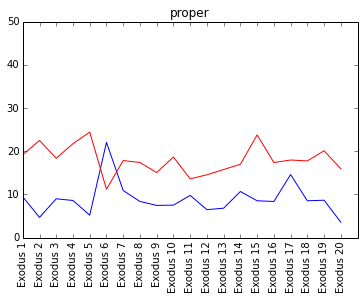

In [7]:
x = range(len(ch))
start = 50
end = 70
fig = plt.figure()
plt.plot(x[start:end], p[start:end], 'b-', x[start:end], v[start:end], 'r-')
plt.axis([start, end, 0, 50])
plt.xticks(x[start:end], ch[start:end], rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15);
plt.title('proper');